In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184097 sha256=0b008d52424cd13e24ebd2a465ecb9e0ae9aaeef45c500ab9cd34e07bf443957
  Stored in directory: /root/.cache/pip/wheels/83/55/6b/552e083cf5509c0afe808b76cf434f1be284d01a112623bd37
Successfully built pyod


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.font_manager
from pyod.models.knn import KNN 
from pyod.utils.data import generate_data, get_outliers_inliers
from sklearn.svm import OneClassSVM  #calculates the number of outliers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from pylab import rcParams

In [ ]:
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes

0.0    13897
1.0       56
Name: Class, dtype: int64

([<matplotlib.axis.XTick at 0x7f1eac11a1a0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

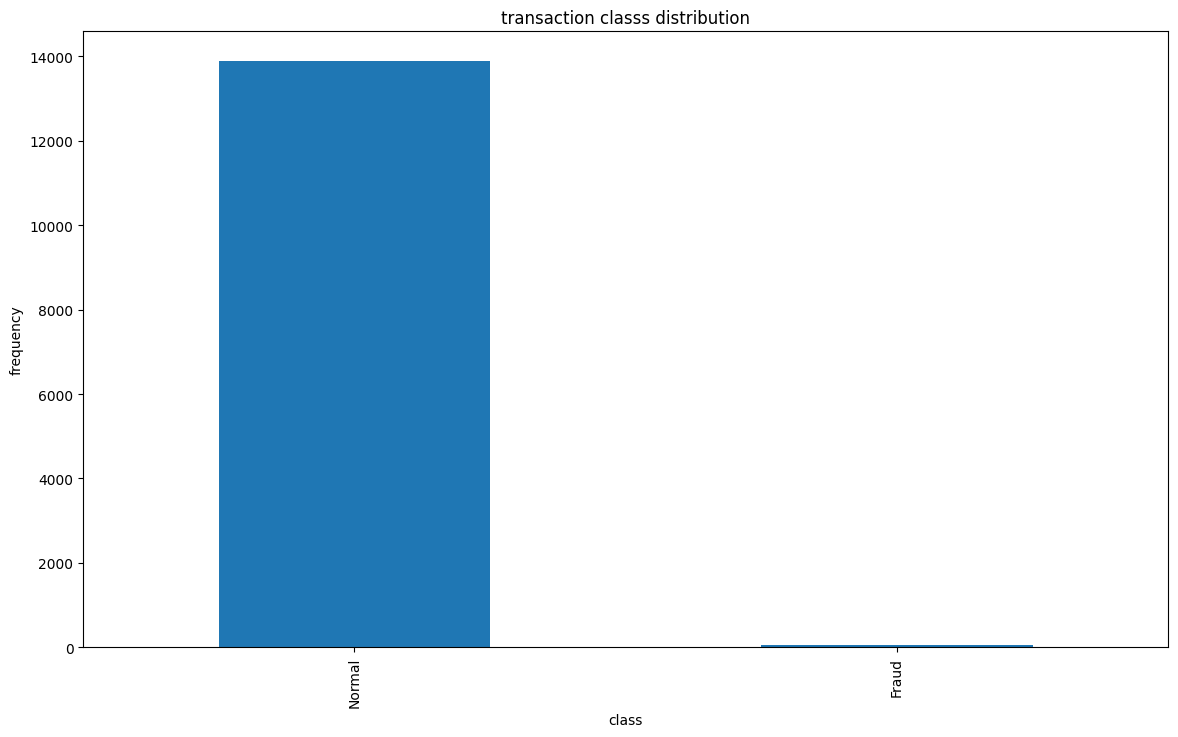

In [ ]:
count_classes.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('transaction classs distribution')
plt.xticks(range(2),LABELS)

In [ ]:
# getting fraud and normal dataset
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [ ]:
fraud.shape

(56, 31)

In [ ]:
normal.shape

(13897, 31)

In [ ]:
fraud.Amount.describe()

count      56.000000
mean       90.815893
std       310.308450
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    13897.000000
mean        63.773909
std        177.164503
min          0.000000
25%          5.770000
50%         15.900000
75%         52.370000
max       7712.430000
Name: Amount, dtype: float64

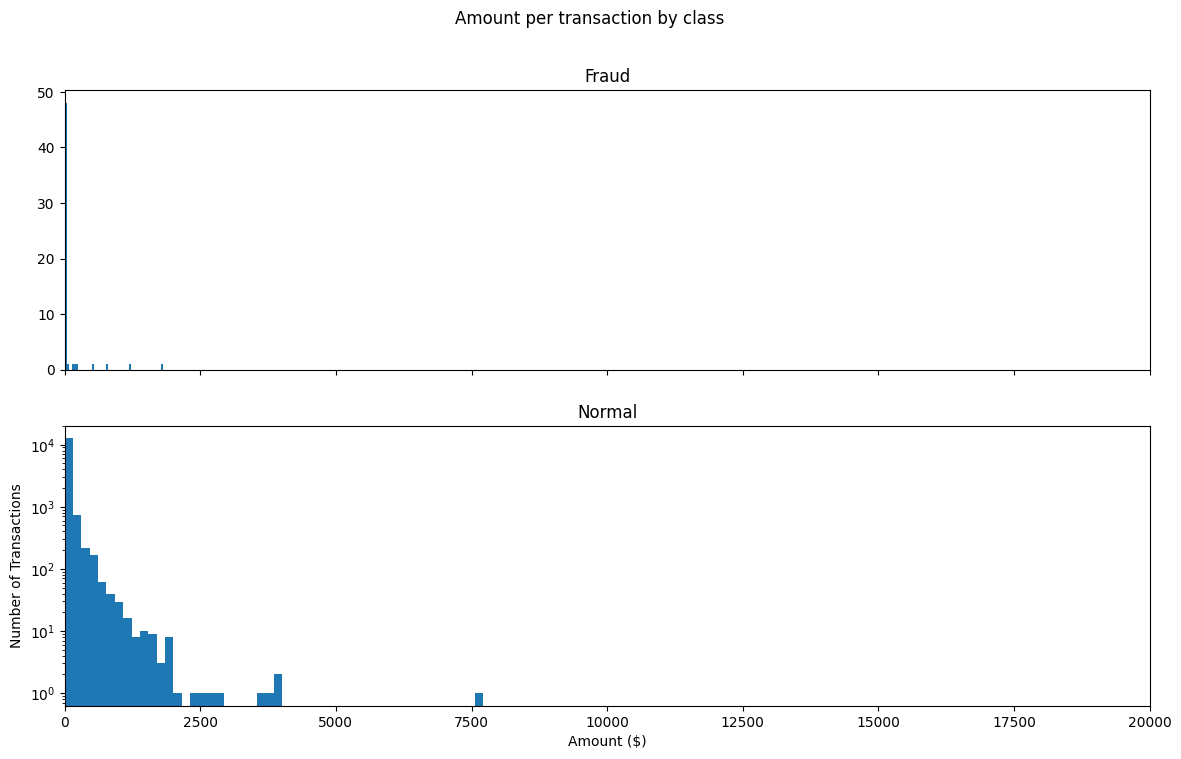

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

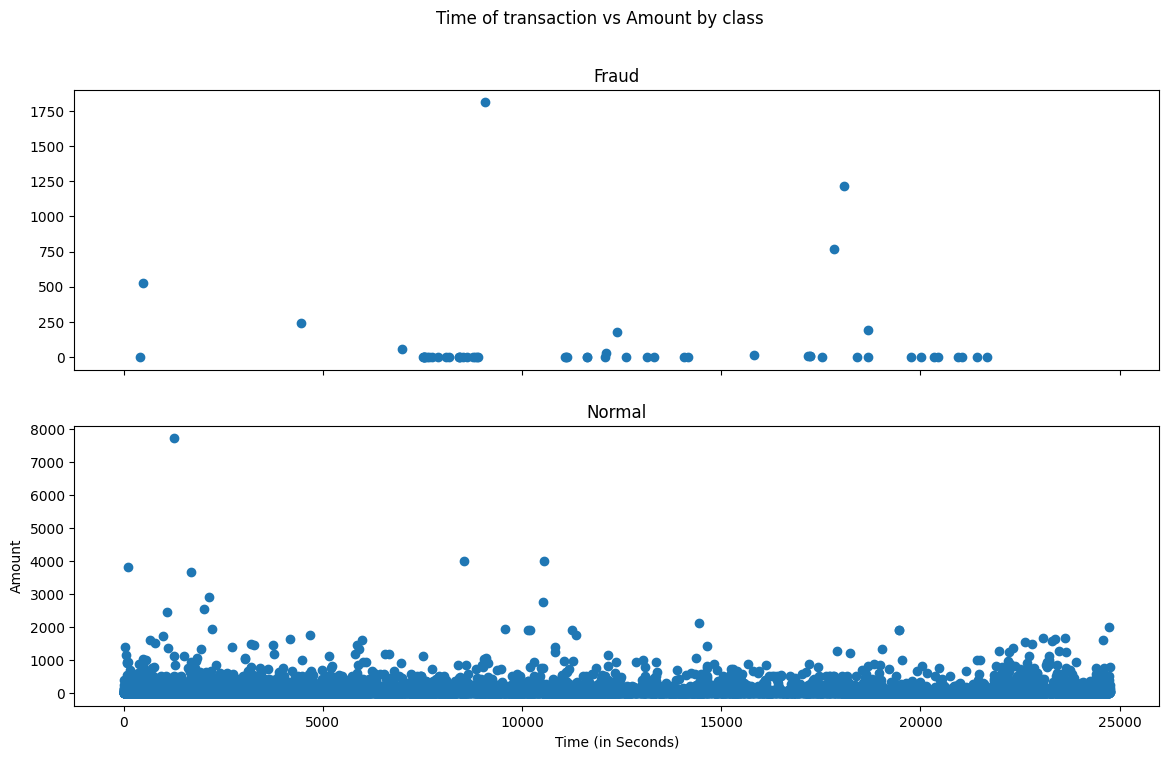

In [ ]:
#plotting time vs fraud
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
df1=df.sample(frac=0.1,random_state=42)
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2019,1559,1.181015,0.183850,0.699030,0.700274,-0.595810,-0.839532,-0.038642,-0.073295,0.078477,...,-0.200933,-0.571252,0.238454,0.587858,0.057450,0.092996,-0.014880,0.019808,0.89,0.0
9438,13915,-3.640776,0.740725,0.832858,0.484796,-1.829981,0.372554,-0.743923,1.291120,1.708930,...,-0.337708,-0.260125,0.196263,-0.035126,0.357282,0.327464,-0.335829,-0.141549,136.02,0.0
5709,6000,-0.123583,1.349227,1.586235,2.863087,0.186651,0.311037,0.206646,0.162382,-0.076605,...,-0.152079,-0.159369,-0.055811,-0.093973,-0.410792,0.088325,0.303111,0.118106,4.61,0.0
12264,21424,1.155512,0.017170,0.300475,0.100260,-0.021772,0.112933,-0.258075,0.078982,1.160654,...,-0.066278,0.087403,0.019467,-0.279392,0.176493,1.042206,-0.091206,-0.022874,13.55,0.0
5403,5360,1.012633,0.185475,1.857025,2.625659,-0.813666,0.741190,-1.050536,0.411454,1.078232,...,0.167710,0.665263,0.034245,0.149376,0.061459,0.073727,0.024627,0.023361,12.14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5430,5418,0.948269,-0.486024,0.545397,1.494124,0.165615,1.995990,-0.609878,0.423991,2.362339,...,-0.559439,-1.157806,-0.229156,-1.767585,0.566754,-0.470223,0.038593,0.014016,121.00,0.0
251,171,-0.957820,0.247979,3.772857,3.311385,-1.305427,1.668379,-0.671931,0.453987,0.555107,...,0.107106,0.866859,-0.431986,0.581400,-0.015715,0.462414,-0.179224,-0.171544,71.69,0.0
611,460,1.314054,0.433171,-0.577559,0.715883,0.683583,-0.194720,0.442210,-0.147779,-0.495027,...,-0.018596,-0.016909,-0.306040,-0.810191,0.986072,-0.242416,-0.011943,-0.010327,2.85,0.0
8443,11326,-0.574412,1.077251,2.946749,2.596946,-0.072033,0.900387,-0.134659,0.303339,0.617274,...,-0.119434,0.072215,-0.125845,0.024788,-0.270748,0.025602,0.131290,0.116322,0.00,0.0


In [ ]:
fr=df1[df1['Class']==1]
val=df1[df1['Class']==0]
outlier=len(fr)/float(len(val))
outlier

0.0035971223021582736

In [ ]:
len(fraud)

56

In [ ]:
len(val)

1390

In [ ]:
import seaborn as sns

In [ ]:
#calculate correlation
cor=df1.corr()
top_corr_features=cor.index
plt.figure(figsize=(40,40))
plt.tight_layout()

<Figure size 4000x4000 with 0 Axes>

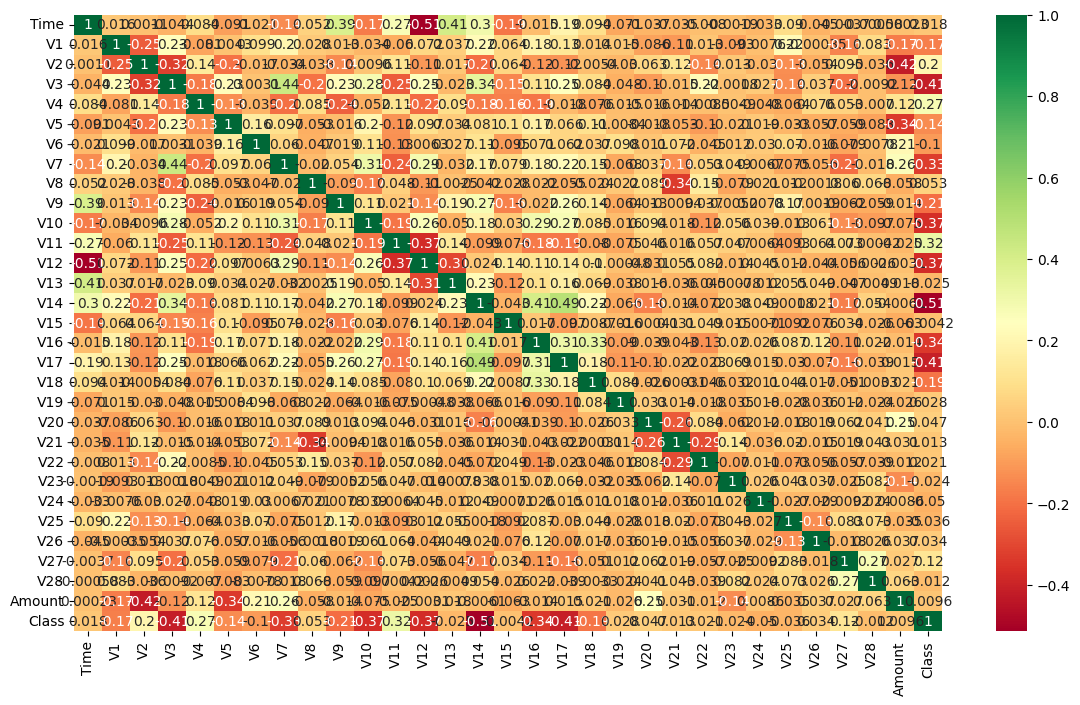

In [ ]:
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
cols=df1.columns.to_list()
print(cols,end=" ")

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'] 

In [ ]:
cols=[c for c in cols if c not in ['Class']]
cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
target="Class"

In [ ]:
#define a random state
state=np.random.RandomState(42)
X=df1[cols]
Y=df1[target]
X_outlier=state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))

In [ ]:
print(X.shape)
print(Y.shape)

(1395, 30)
(1395,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [ ]:
type(classifiers)

dict

In [ ]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)      
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 7
Accuracy Score :
0.9949820788530466
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1390
         1.0       0.33      0.40      0.36         5

    accuracy                           0.99      1395
   macro avg       0.67      0.70      0.68      1395
weighted avg       1.00      0.99      1.00      1395

Local Outlier Factor: 11
Accuracy Score :
0.9921146953405018
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1390
         1.0       0.00      0.00      0.00         5

    accuracy                           0.99      1395
   macro avg       0.50      0.50      0.50      1395
weighted avg       0.99      0.99      0.99      1395

Support Vector Machine: 822
Accuracy Score :
0.410752688172043
Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.41      